In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

In [10]:
# VOR/DME example from class
# definitions first

x1bar = 40 # km E of VOR/DME
x2bar = 30 # km N of VOR/DME
x1v = 0 # VOR at origin
x2v = 0 # VOR at origin

x_bar = np.array([[x1bar, x2bar]]).T # prior knowledge location

sig_x1_2 = 5**2 # prior E variance
sig_x2_2 = 5**2 # prior N variance
P_bar = np.array([[sig_x1_2, 0],
                  [0, sig_x2_2]]) # prior covariance matrix

x1_star = x1bar # set guess at prior
x2_star = x2bar # set guess at prior
x_star = np.array([[x1_star, x2_star]]).T # guess vector


theta = np.arctan((x1_star-x1v)/(x2_star-x2v)) # original angle from N in radians
rho = ((x1_star-x1v)**2 + (x2_star-x2v)**2)**0.5 # original distance, km
h_x_star = np.array([[theta, rho]]).T

z1 = 52.4 * np.pi/180 # measured angle, degrees converted to radians
z2 = 48.7 # measured distance, km
z = np.array([[z1, z2]]).T # measurement vector

sig_theta = 0.3 *np.pi/180 # stdev of angle msmt, converted to radians
sig_rho = 0.15 # km
sig_theta_2 = sig_theta ** 2
sig_rho_2 = sig_rho ** 2
V = np.array([[sig_theta_2, 0], 
              [0, sig_rho_2]]) # msmt covariance matrix

H11 = (x2_star-x2v)/((x1_star-x1v)**2 + (x2_star-x2v)**2)
H12 = -(x1_star-x1v)/((x1_star-x1v)**2 + (x2_star-x2v)**2)
H21 = (x1_star-x1v)/(((x1_star-x1v)**2 + (x2_star-x2v)**2)**0.5)
H22 = (x2_star-x2v)/(((x1_star-x1v)**2 + (x2_star-x2v)**2)**0.5)
H = np.array([[H11, H12],
              [H21, H22]]) # observation matrix

L = P_bar @ H.T @ np.linalg.inv(H @ P_bar @ (H.T) + V) # Kalman gain

print("Part A:")
z_star = z - h_x_star + (H@x_star)
x_hat = x_bar + L @ (z_star - (H @ x_bar))
print("\nx_hat [km]:\n", x_hat)
P_hat = (np.eye(2) - (L@H)) @ P_bar # posterior covariance = (I-LH)P_hat
print("\nP_hat [km^2]:\n", P_hat)


Part A:

x_hat [km]:
 [[38.57969964]
 [29.7290154 ]]

P_hat [km^2]:
 [[ 0.0389936  -0.02201845]
 [-0.02201845  0.0518377 ]]


Part B: Covariance ellipse

One sigma, axes of ellipse:
For rho:  0.14993254552836122 
For theta: 0.2614412550689934

Eigenvectors of covariance, clearly orthogonal: 
 [[-0.8  0.6]
 [-0.6 -0.8]]


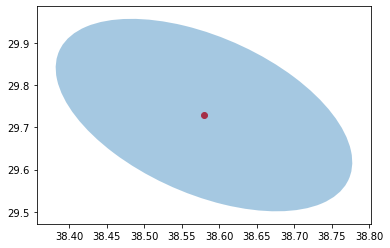

In [31]:
print("Part B: Covariance ellipse")
eigs,vecs = np.linalg.eig(P_hat)

eigs[0]**0.5
print("\nOne sigma, axes of ellipse:\nFor rho: ", eigs[0]**.5, "\nFor theta:", eigs[1]**0.5) # axis lengths, sqrt(eig)
print("\nEigenvectors of covariance, clearly orthogonal: \n", vecs)

fig, ax = plt.subplots()
#sort
order = eigs.argsort()[::-1]
eigs, vecs = eigs[order], vecs[:, order]
# rotation
vx, vy = vecs[:,0][0], vecs[:,0][1]
theta_hat = np.arctan2(vy, vx)

width, height = 2 * 1 * np.sqrt(eigs)
e = Ellipse(xy=x_hat, width=width, height=height, angle=np.degrees(theta_hat), alpha=0.4)

# ax.set_xlim(0,50)
# ax.set_ylim(0,50)
ax.scatter(x_hat[0], x_hat[1], color='Red')
ax.add_patch(e)

plt.show()